In [1]:
import torch
import os
from tools import *
from model import *
from Dictionary import lab
from data_generator import Generator
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
model = Net1()
model = torch.nn.DataParallel(model)
load_model(model,m=1)
model = model.eval()

模型参数加载成功！


In [3]:
images = []
filename = os.listdir('./921')
for i in filename:
    img = cv.imread('./921/'+i, 0)
    img = cv.resize(img,(224,224))
    img = (img-img.mean())/max(img.std(),1/224)
    images.append(img)
images = torch.Tensor(images).permute(2,0,1)
images= images.reshape(1,5,224,224)
model(images,1)

tensor([[ 6.3626, -4.7396, -3.9991]], grad_fn=<AddmmBackward>)

In [4]:
x = model.module.features[0:3](images)
x1 = x.detach().numpy()
x1.shape

(1, 64, 111, 111)

***第一层DSC后的feature map

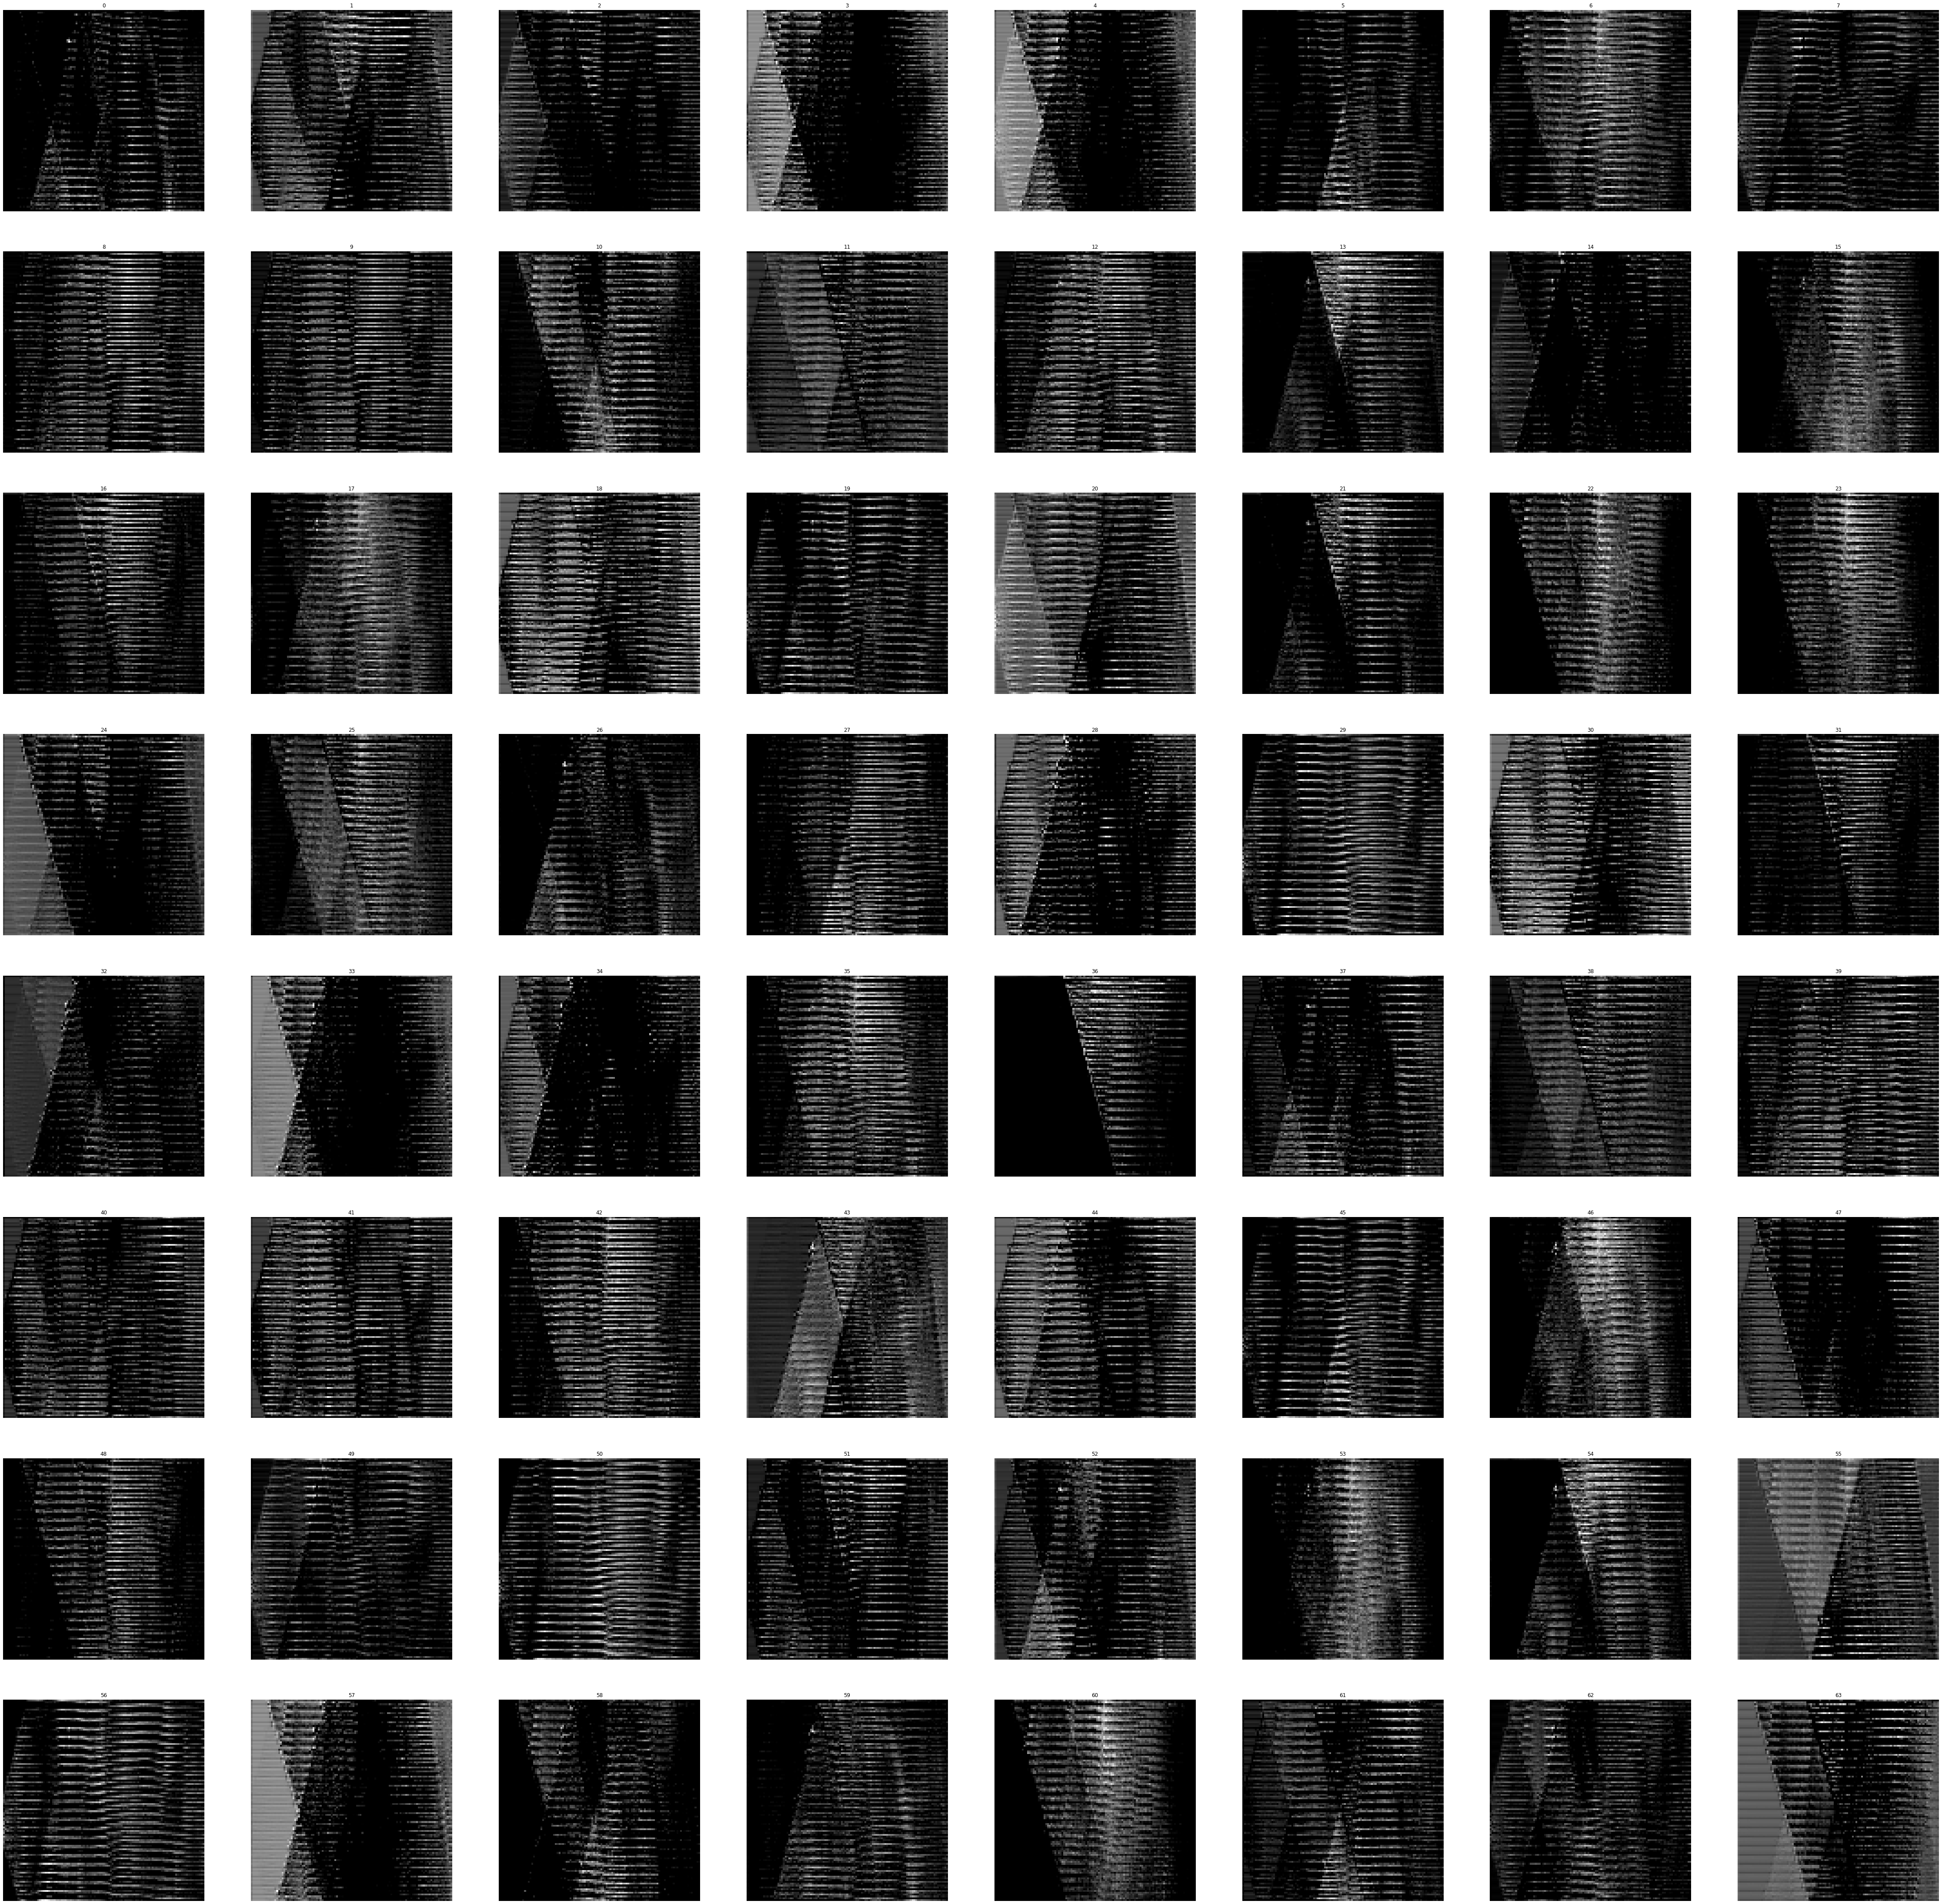

In [5]:
plt.figure(figsize=(80,80))
for index in range(0, 64):
    plt.subplot(8, 8, index+1)
    plt.title(str(index))
    plt.imshow(x1[0,index,:,:], cmap='gray')
    #plt.imshow(x1[0,index,:,:])
    plt.axis('off')
plt.show()

***第二层DSC后的feature map

In [6]:
x = model.module.features[3:7](x)
x2 = x.detach().numpy()#等于tensor.data
x2.shape

(1, 192, 27, 27)

In [38]:
plt.figure(figsize=(80,240))
for index in range(0, 192):
    plt.subplot(25, 8, index+1)
    plt.title(str(index))
    plt.imshow(x2[0,index,:,:], cmap='gray')
    #plt.imshow(x1[0,index,:,:])
    plt.axis('off')
plt.show()

In [25]:
model.module.features[4].conv1.weight.data.shape

torch.Size([64, 1, 5, 5])

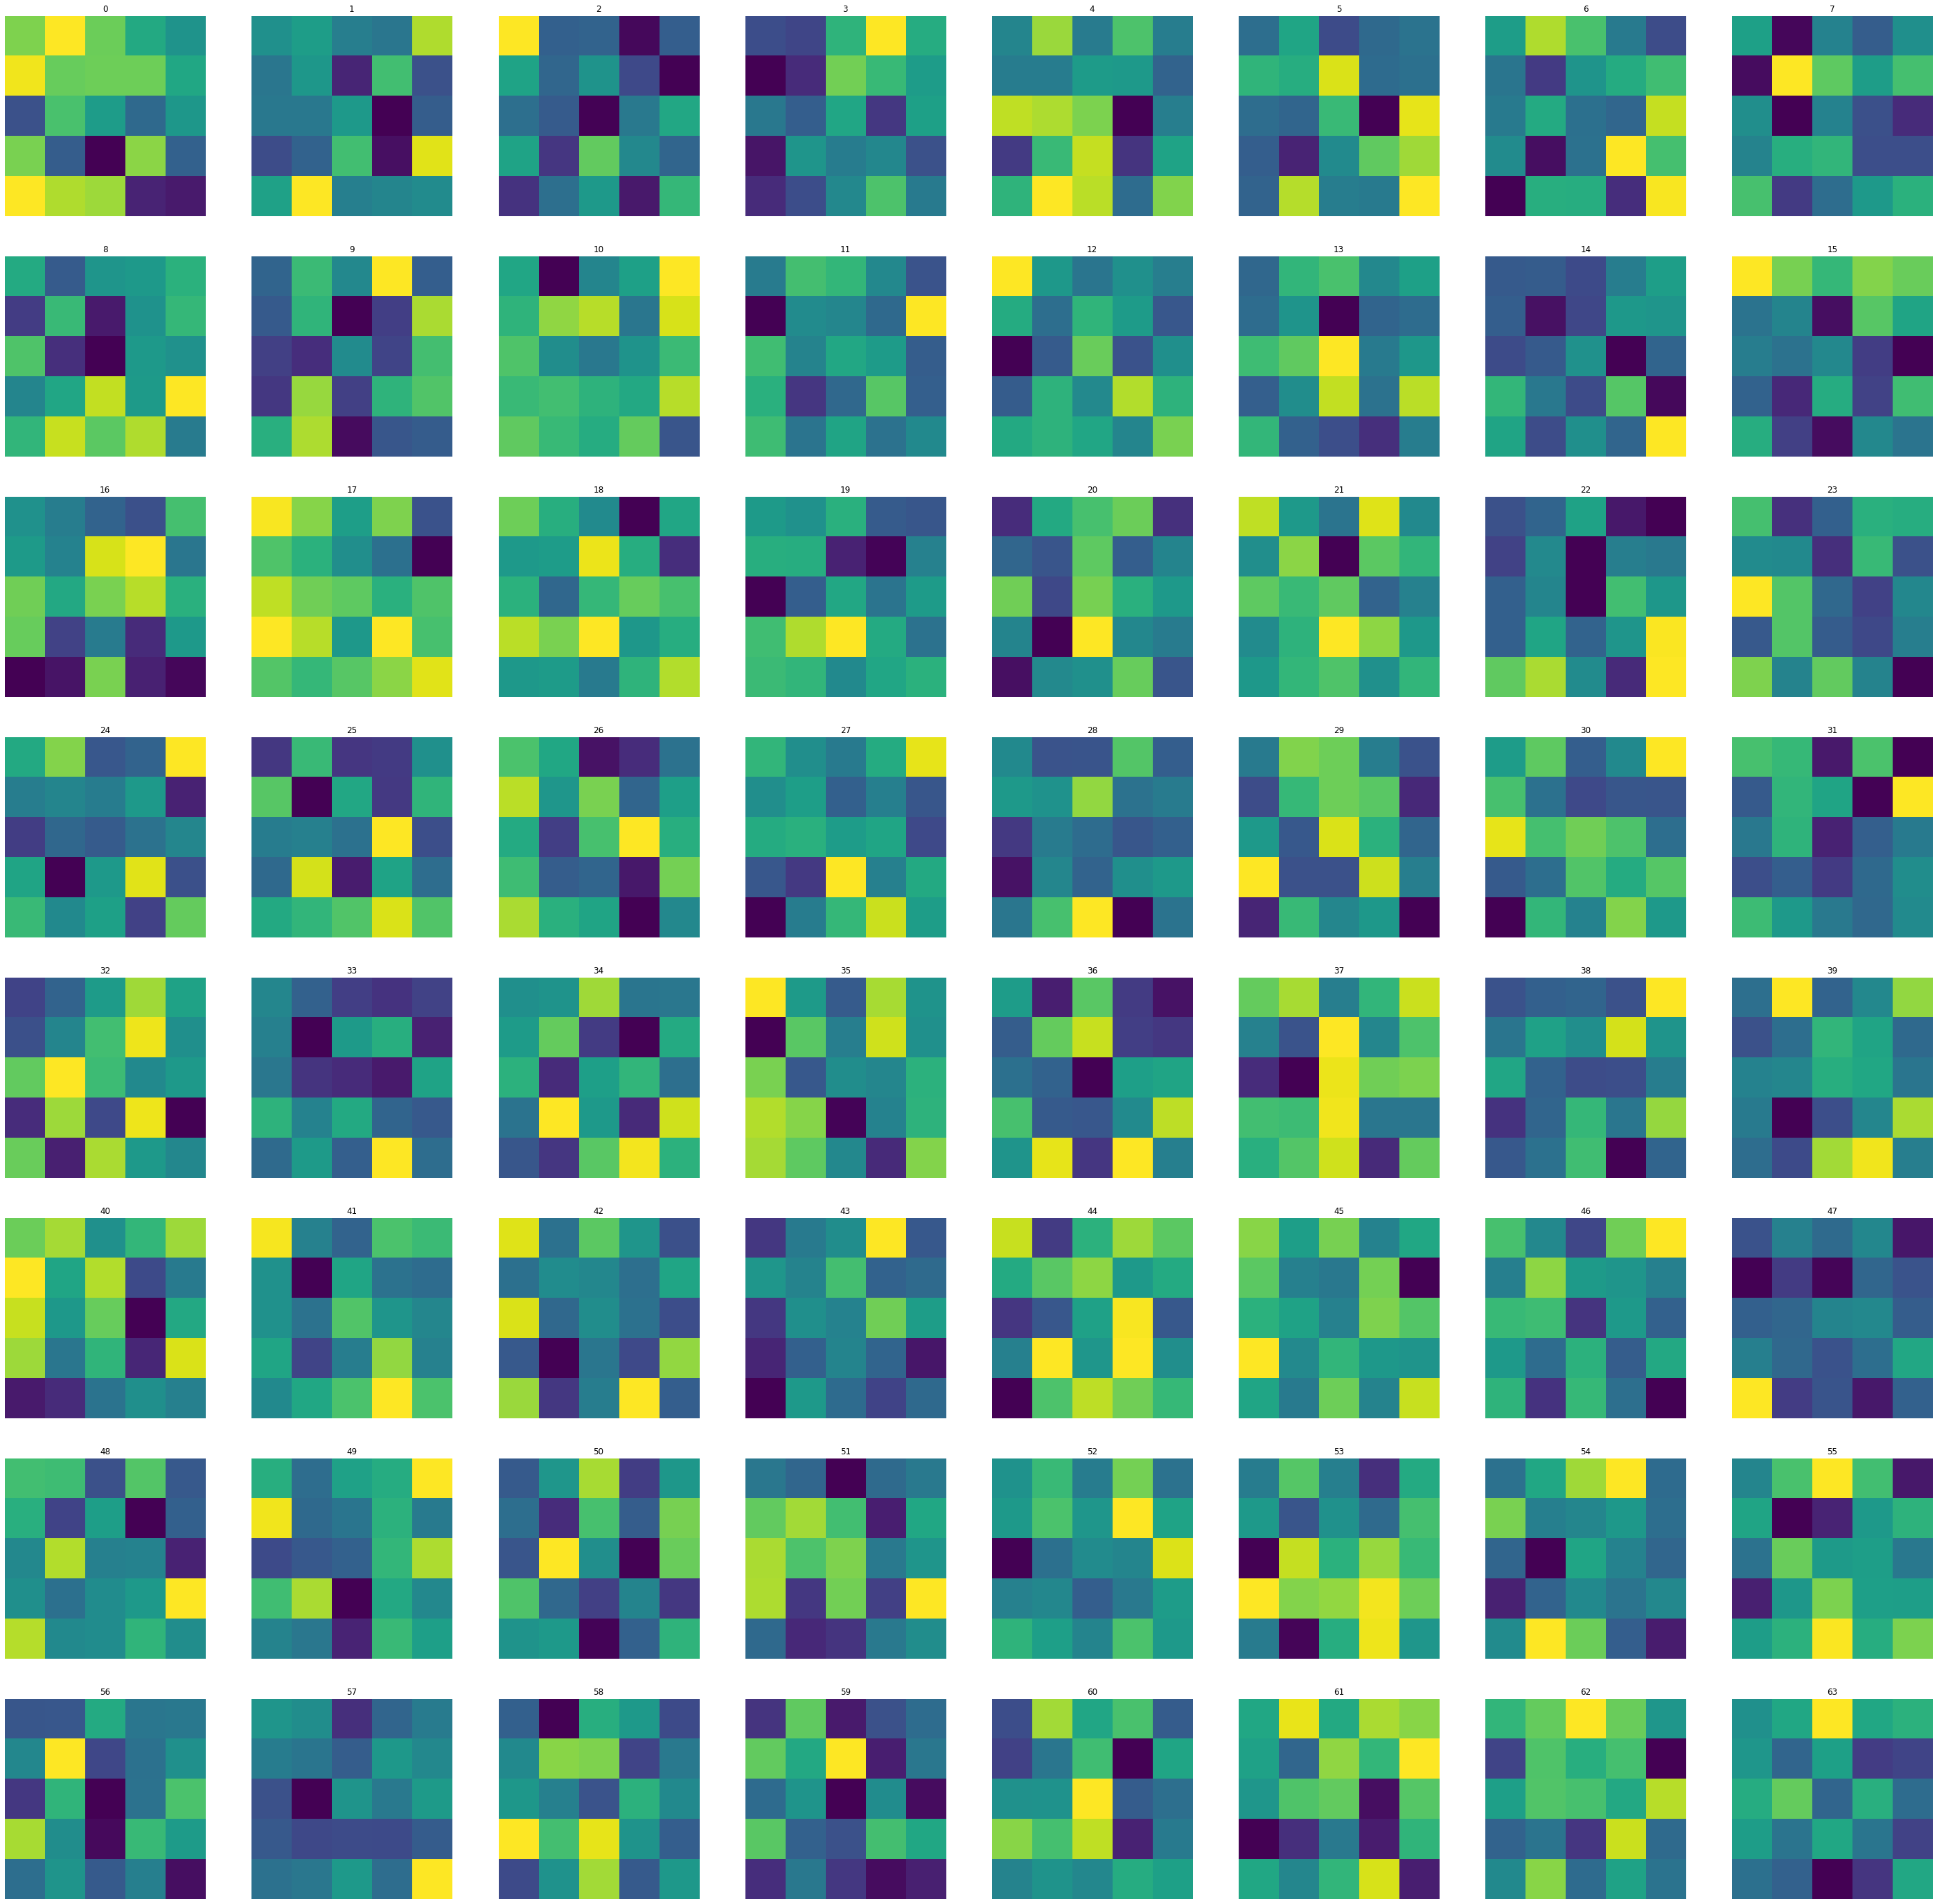

In [34]:
plt.figure(figsize=(50,50))
for index in range(64):
    plt.subplot(8, 8, index+1)
    plt.title(str(index))
    plt.imshow(model.module.features[4].conv1.weight.data[index,0,:,:], cmap='gray')
    #plt.imshow(x1[0,index,:,:])
    plt.axis('off')
plt.show()

**训练曲线
model1

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
data = pd.read_csv('./train_data1.csv')
lr = data['learning rate']
train_loss = data['train_loss']
train_acc = data['train_acc']
verify_loss = data['verify_loss']
verify_acc = data['verify_acc']
x = np.arange(77)*100

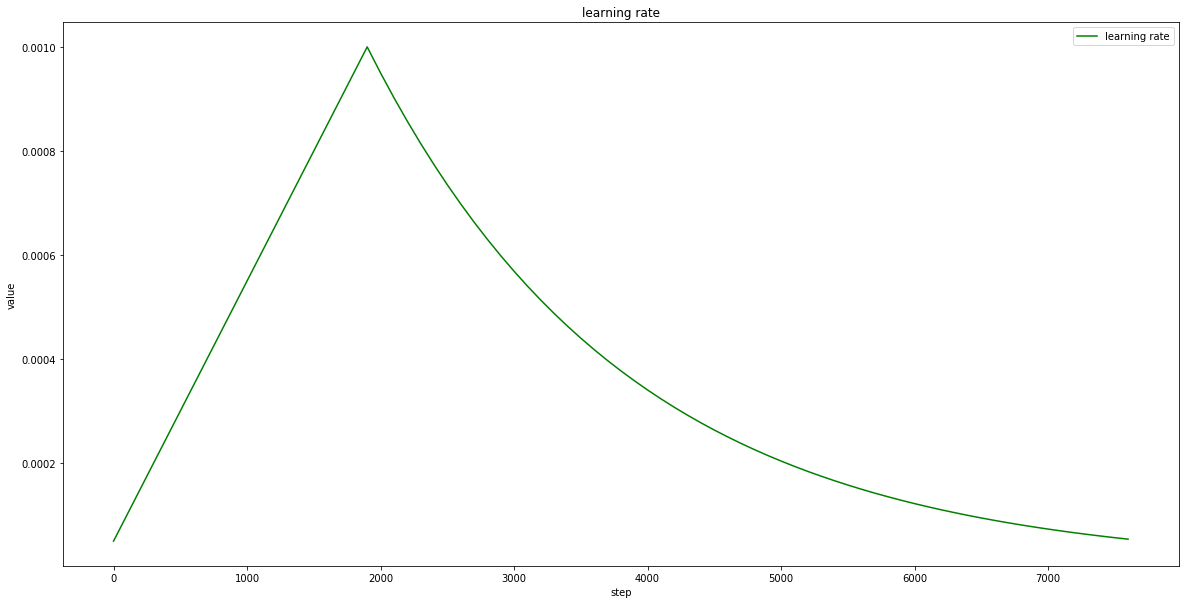

In [49]:
plt.figure(figsize=(20,10))
plt.plot(x, lr, 'g', label='learning rate')
plt.xlabel('step')
plt.ylabel('value')
plt.title('learning rate')
plt.legend(loc='best')  # 控制图片显示的位置
plt.show()

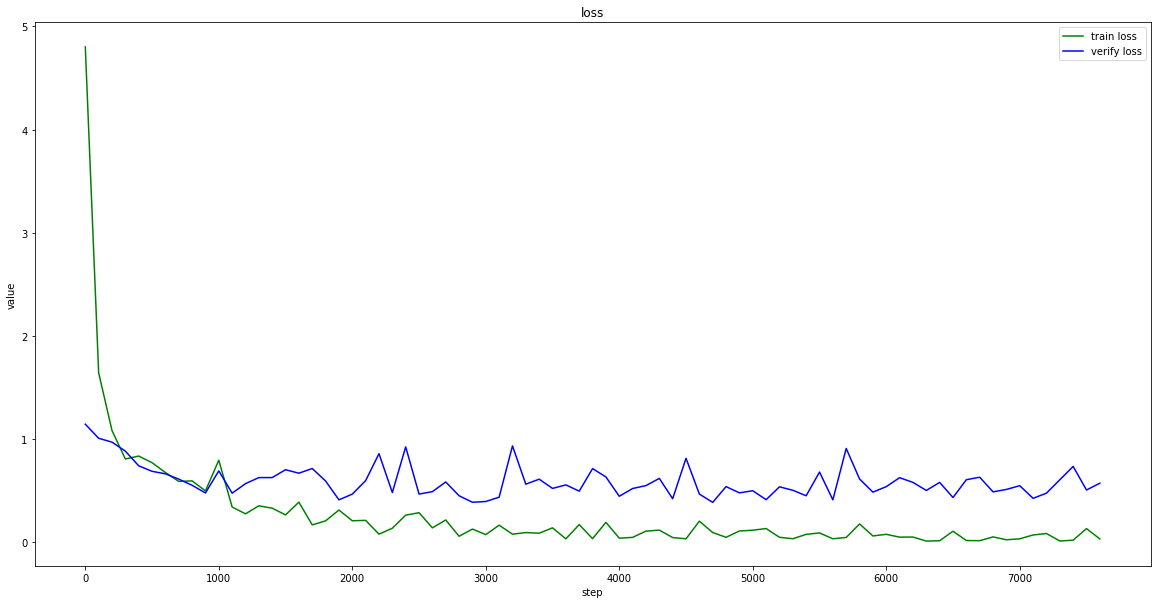

In [50]:
plt.figure(figsize = (20,10))
plt.plot(x, train_loss, 'g', label='train loss')
plt.plot(x, verify_loss, 'b', label='verify loss')
plt.xlabel('step')
plt.ylabel('value')
plt.title('loss')
plt.legend(loc='best')  # 控制图片显示的位置
plt.show()

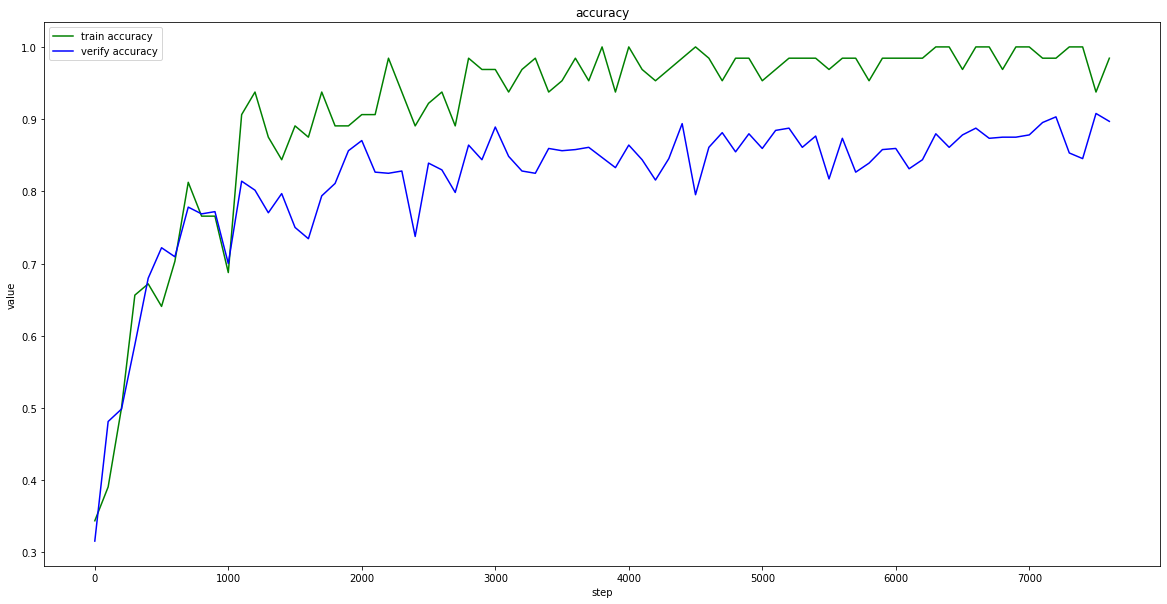

In [51]:
plt.figure(figsize = (20,10))
plt.plot(x, train_acc, 'g', label='train accuracy')
plt.plot(x, verify_acc, 'b', label='verify accuracy')
plt.xlabel('step')
plt.ylabel('value')
plt.title('accuracy')
plt.legend(loc='best')  # 控制图片显示的位置
plt.show()

**model2

In [52]:
data = pd.read_csv('./train_data2.csv')
lr = data['learning rate']
train_loss = data['train_loss']
train_acc = data['train_acc']
verify_loss = data['verify_loss']
verify_acc = data['verify_acc']
x = np.arange(69)*100

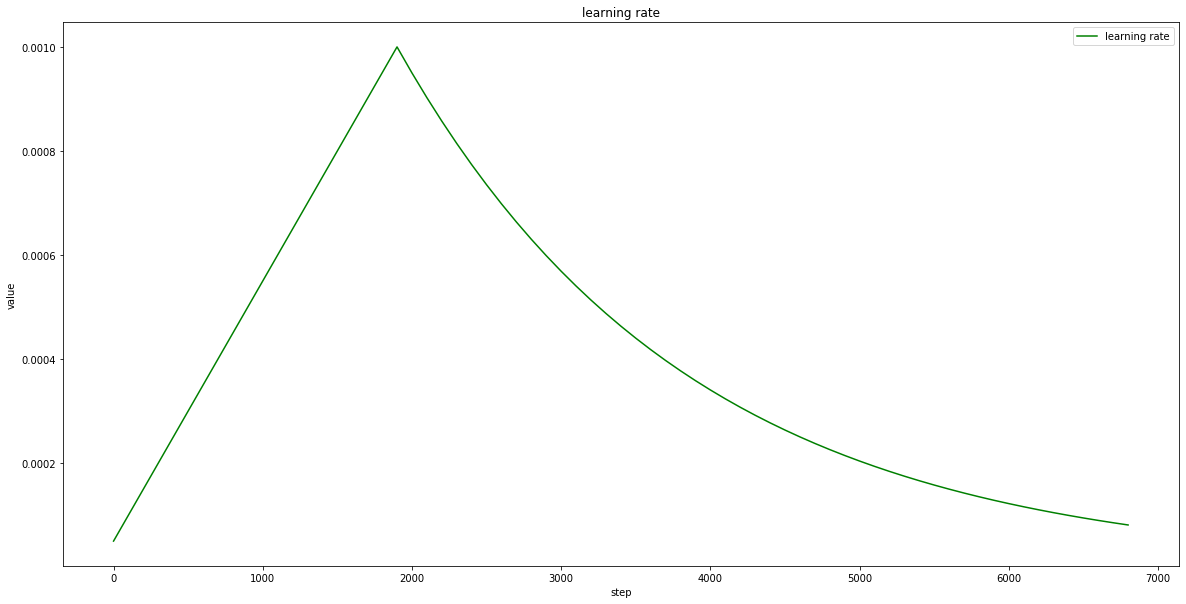

In [53]:
plt.figure(figsize=(20,10))
plt.plot(x, lr, 'g', label='learning rate')
plt.xlabel('step')
plt.ylabel('value')
plt.title('learning rate')
plt.legend(loc='best')  # 控制图片显示的位置
plt.show()

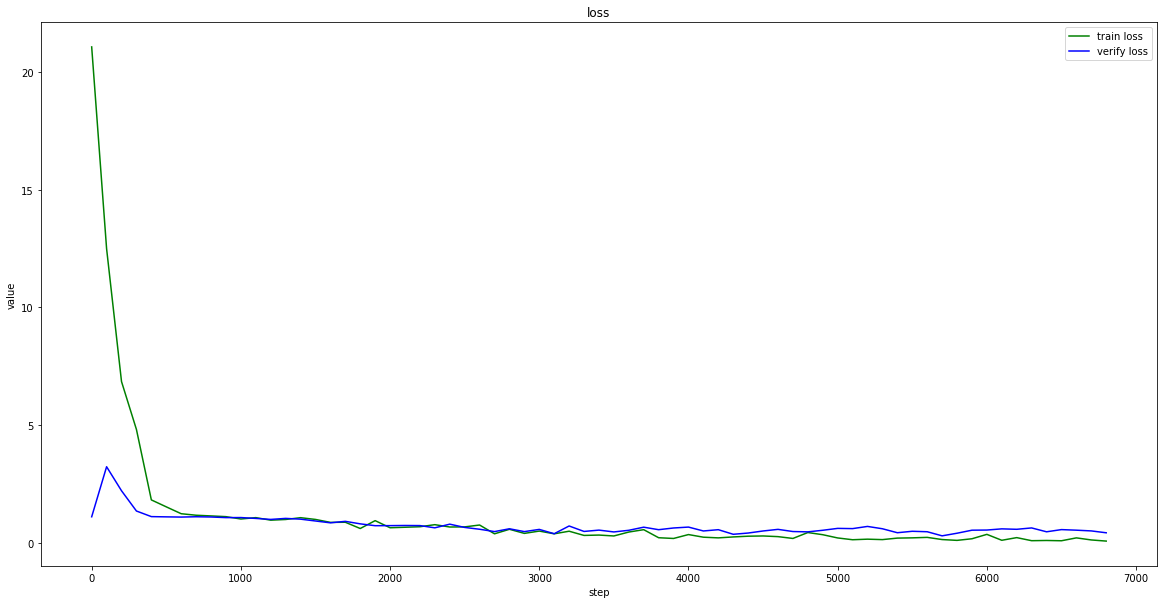

In [54]:
plt.figure(figsize = (20,10))
plt.plot(x, train_loss, 'g', label='train loss')
plt.plot(x, verify_loss, 'b', label='verify loss')
plt.xlabel('step')
plt.ylabel('value')
plt.title('loss')
plt.legend(loc='best')  # 控制图片显示的位置
plt.show()

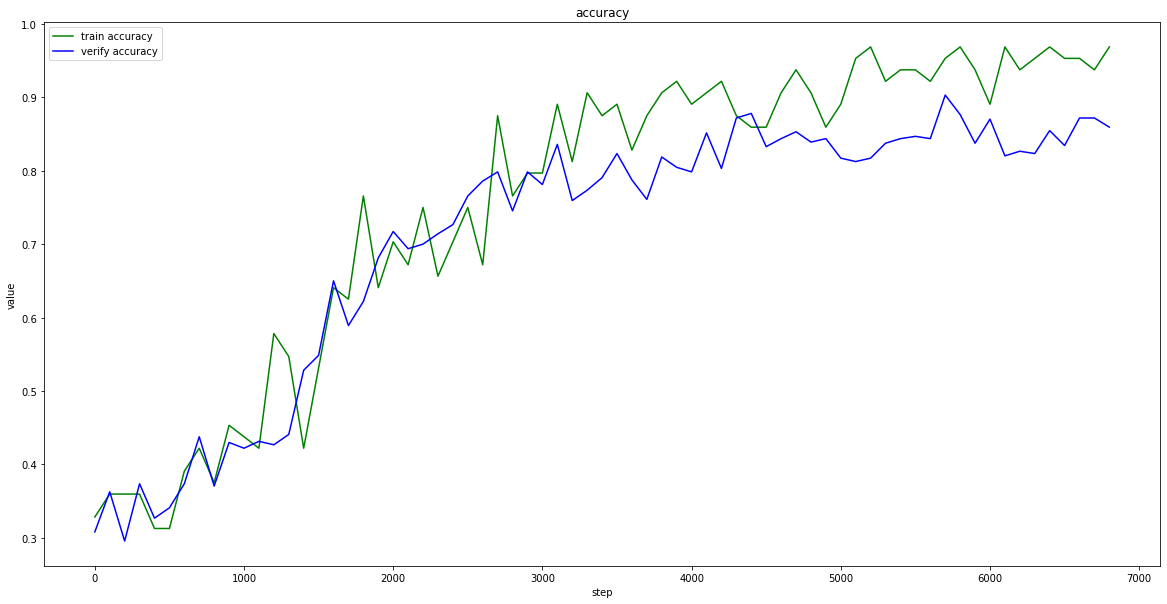

In [55]:
plt.figure(figsize = (20,10))
plt.plot(x, train_acc, 'g', label='train accuracy')
plt.plot(x, verify_acc, 'b', label='verify accuracy')
plt.xlabel('step')
plt.ylabel('value')
plt.title('accuracy')
plt.legend(loc='best')  # 控制图片显示的位置
plt.show()

**model3

In [56]:
data = pd.read_csv('./train_data3.csv')
lr = data['learning rate']
train_loss = data['train_loss']
train_acc = data['train_acc']
verify_loss = data['verify_loss']
verify_acc = data['verify_acc']
x = np.arange(69)*100

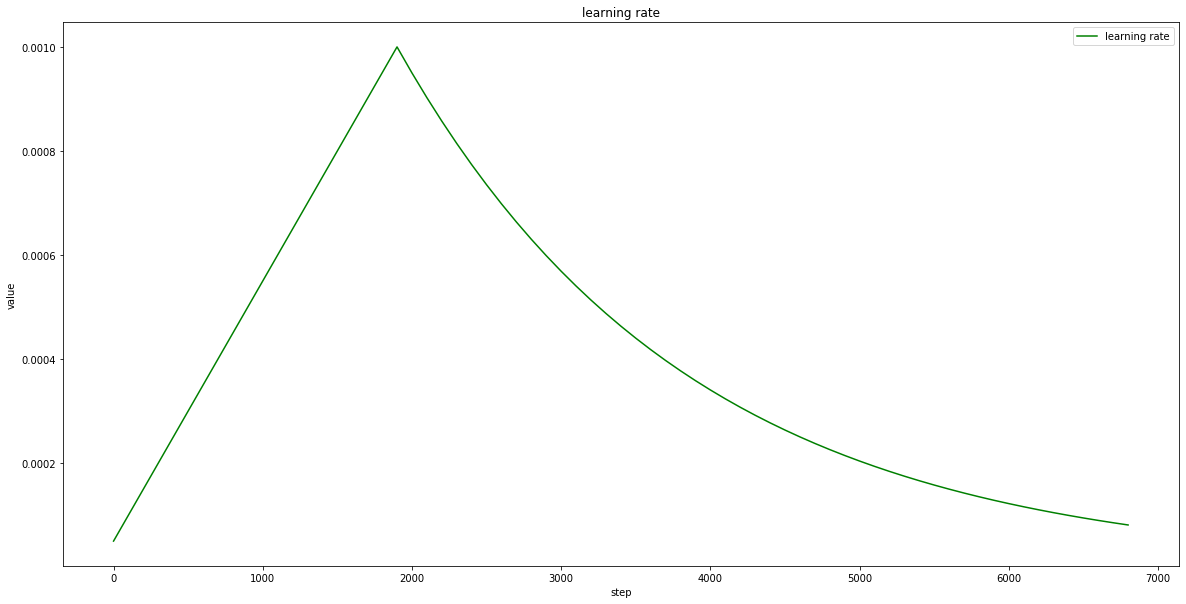

In [57]:
plt.figure(figsize=(20,10))
plt.plot(x, lr, 'g', label='learning rate')
plt.xlabel('step')
plt.ylabel('value')
plt.title('learning rate')
plt.legend(loc='best')  # 控制图片显示的位置
plt.show()

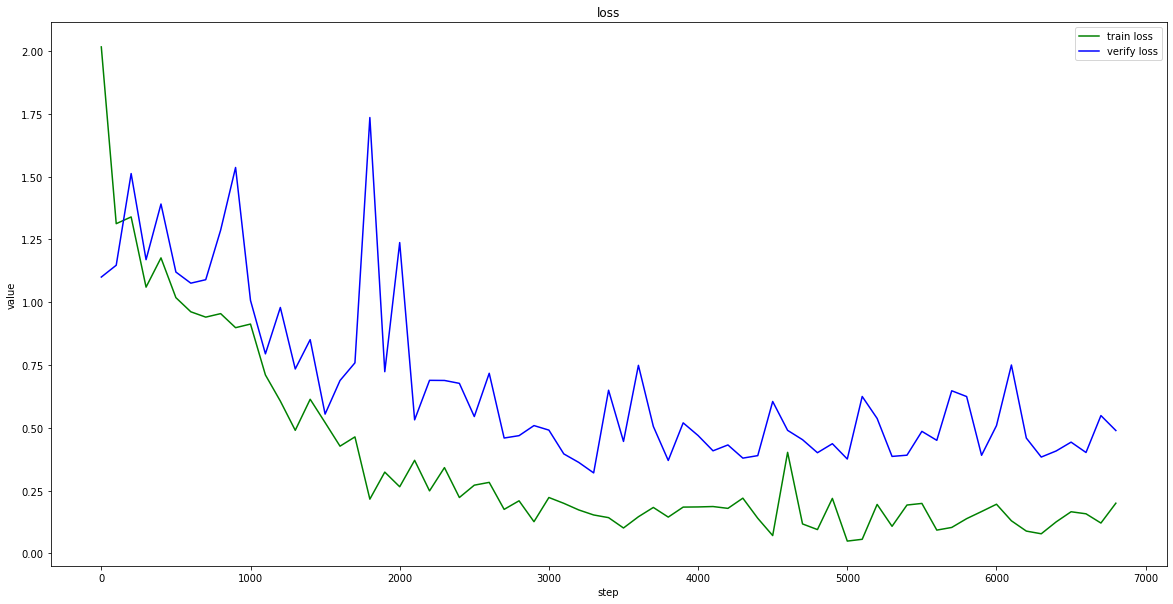

In [58]:
plt.figure(figsize = (20,10))
plt.plot(x, train_loss, 'g', label='train loss')
plt.plot(x, verify_loss, 'b', label='verify loss')
plt.xlabel('step')
plt.ylabel('value')
plt.title('loss')
plt.legend(loc='best')  # 控制图片显示的位置
plt.show()

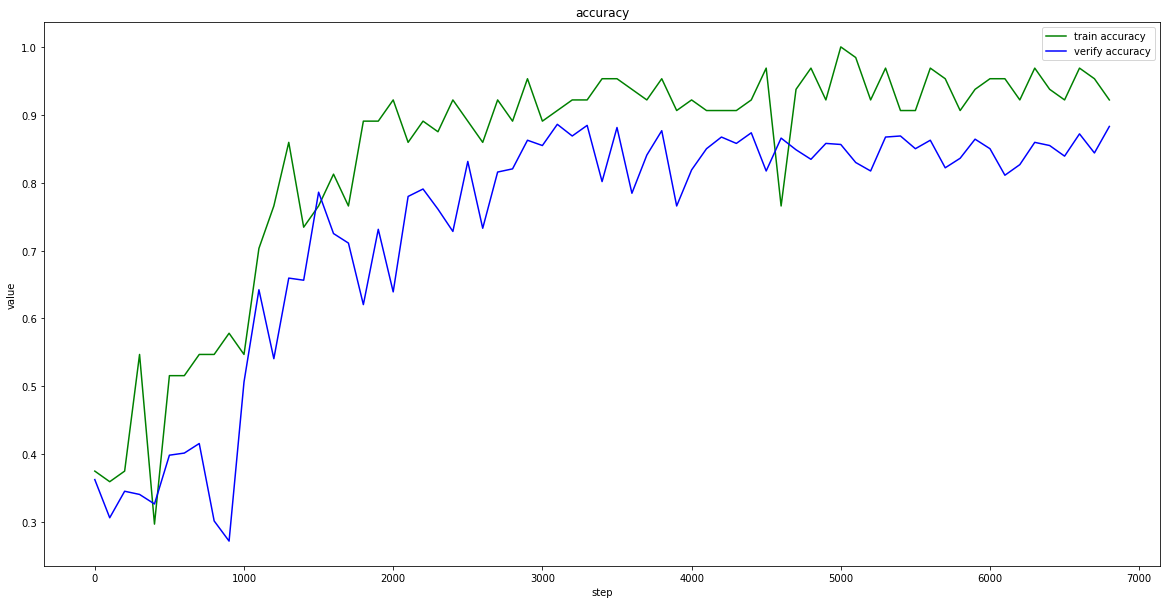

In [59]:
plt.figure(figsize = (20,10))
plt.plot(x, train_acc, 'g', label='train accuracy')
plt.plot(x, verify_acc, 'b', label='verify accuracy')
plt.xlabel('step')
plt.ylabel('value')
plt.title('accuracy')
plt.legend(loc='best')  # 控制图片显示的位置
plt.show()

In [6]:
from data_generator import Generator
import time as t

In [7]:
a = Generator(batch=64, aug = False)

In [8]:
t1 = t.time()
for i in range(10):
    next(a)
t2 = t.time()
t2-t1

7.819514989852905